# Kruskal-Wallis H test
* Use when you are comparing more than 2 groups that do not have a normal distribution.
* This is the nonparametric counter part of one-way ANOVA.
* $H_0$: The median of the groups are equal OR all the sample distributions are equal.
* $H_1$: The median of one or more groups are not equal OR one or more sample distributions are not equal.
* $\alpha = 0.05$

In [ ]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load your dataset

framingham = pd.read_csv('Framingham.csv')
framingham.head()

,Patient_ID,Age_Years,Sex,Systolic,Diastolic,CHD,FollowUp_Months,BMI,month,scl
0,457,62,1,138,76,0,7905,16.200001,2,182
1,95,34,0,124,80,0,11627,16.400000,1,203
2,2478,41,0,102,74,0,11688,16.500000,6,271
3,4513,36,0,148,104,0,8024,16.700001,12,192
4,1283,40,0,110,78,0,11688,16.700001,3,242


## Peform summary statistics

In [ ]:
# Convert observations in Patient_ID as string
framingham['Patient_ID'] = framingham['Patient_ID'].apply(str)

# Convert observations in Sex as categorical/string
framingham['Sex'] = framingham['Sex'].apply(str)

# Convert observations in CHD as categorical/string
framingham['CHD'] = framingham['CHD'].apply(str)

# Rename/simplify column name
framingham = framingham.rename(columns = {'Age_Years':'Age', 'FollowUp_Months':'FollowUp','scl':'Cholesterol'})

framingham.describe()

,Age,Systolic,Diastolic,FollowUp,BMI,month,Cholesterol
count,4699.000000,4699.000000,4699.000000,4699.000000,4699.000000,4699.000000,4699.000000
mean,46.041073,132.766546,82.541605,8061.313258,25.655203,6.369227,229.087253
std,8.504363,22.801104,12.737322,3595.310856,4.125778,3.683821,45.381863
min,30.000000,80.000000,40.000000,18.000000,16.200001,1.000000,115.000000
25%,39.000000,116.000000,74.000000,5136.500000,22.900000,3.000000,198.000000
50%,45.000000,130.000000,80.000000,8908.000000,25.200001,6.000000,225.000000
75%,53.000000,144.000000,90.000000,11648.000000,28.000000,10.000000,255.000000
max,68.000000,270.000000,148.000000,11688.000000,57.599998,12.000000,568.000000


## Create groups base on the BMI
* Underweight: less than 18.5
* Normal: 18.5 to 24.9
* Overweight: 25 to 29.9
* Obese class I: 30 to 34.9
* Obese class II: 35 to 39.9
* Obese class III: more than or equal to 40

In [ ]:
# Subset dataframe
Underweight = framingham[framingham['BMI'] < 18.5]
Normal = framingham[(framingham['BMI'] >= 18.5) & (framingham['BMI'] < 25)]
Overweight = framingham[(framingham['BMI'] >= 25) & (framingham['BMI'] < 30)]
Obese1 = framingham[(framingham['BMI'] >= 30) & (framingham['BMI'] < 35)]
Obese2 = framingham[(framingham['BMI'] >= 35) & (framingham['BMI'] < 40)]
Obese3 = framingham[framingham['BMI'] >= 40]

# Subset array
Underweight = Underweight['Cholesterol']
Normal = Normal['Cholesterol']
Overweight = Overweight['Cholesterol']
Obese1 = Obese1['Cholesterol']
Obese2 = Obese2['Cholesterol']
Obese3 = Obese3['Cholesterol']

# Create the dataframe
BMIgroup = [['Underweight', Underweight],
            ['Normal', Normal],
            ['Overweight', Overweight],
            ['Obese I', Obese1],
            ['Obese II', Obese2],
            ['Obese III', Obese3]]
BMIgroup = pd.DataFrame(BMIgroup, columns = ['BMI', 'Cholesterol'])

## Visualize your data

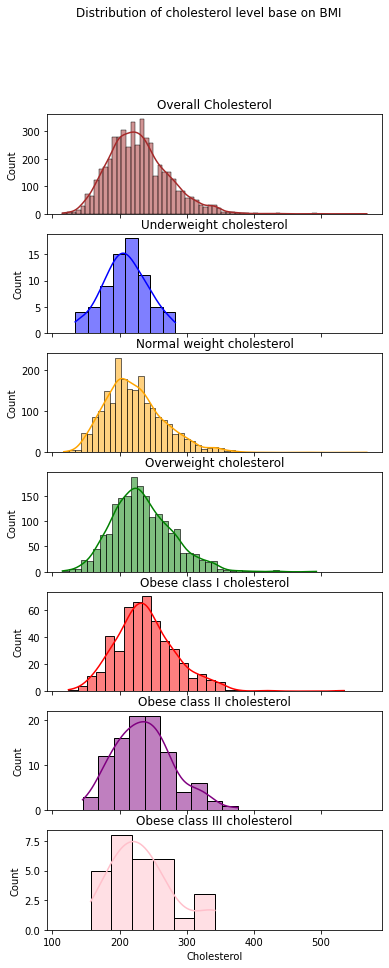

In [ ]:
# Create dataset which contains BMI
OverallChole = framingham['Cholesterol']

# Create figure and title
fig, axs = plt.subplots(7, 1, figsize=(6, 15), sharex=True)
fig.suptitle('Distribution of cholesterol level base on BMI')

# Overall Cholesterol
sns.histplot(OverallChole, ax=axs[0], color='brown', kde=True)
axs[0].set_title('Overall Cholesterol')

# Underweight
sns.histplot(Underweight, ax=axs[1], kde=True, color='blue')
axs[1].set_title('Underweight cholesterol')

# Normal
sns.histplot(Normal, ax=axs[2], kde=True, color='orange')
axs[2].set_title('Normal weight cholesterol')

# Overweight
sns.histplot(Overweight, ax=axs[3], kde=True, color='green')
axs[3].set_title('Overweight cholesterol')

# Obese I
sns.histplot(Obese1, ax=axs[4], kde=True, color='red')
axs[4].set_title('Obese class I cholesterol')

# Obese II
sns.histplot(Obese2, ax=axs[5], kde=True, color='purple')
axs[5].set_title('Obese class II cholesterol')

# Obese III
sns.histplot(Obese3, ax=axs[6], kde=True, color='pink')
axs[6].set_title('Obese class III cholesterol')

plt.show()

## Perform the Kruskal-Wallis H test

In [ ]:
from scipy.stats import kruskal

KWH, pval = kruskal(Underweight, Normal, Overweight, Obese1, Obese2, Obese3)
KWH, pval

(132.2381171595583, 7.971247056819843e-27)

## Interpret the result
The computed p-value is 7.97e-27 which is smaller than the level of significance 0.05. We will reject the null hypothesis. We may conclude that the sample distribution of the groups are not equal.